<a href="https://colab.research.google.com/github/Ravaftersou/FUTURE_DS_03/blob/main/College_event_feedback/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# College Event Feedback Analysis

This notebook performs analysis on student feedback data to uncover satisfaction trends, visualize sentiment, and track time-based performance.

In [4]:
!pip install pandas matplotlib seaborn wordcloud textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
sns.set(style='whitegrid')

In [9]:
# Load the dataset
df = pd.read_csv("data.csv")  # Replace with your actual path if needed
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Student_ID,Event_Name,Department,Year,Date,Speaker_Rating,Content_Rating,Overall_Satisfaction,Would_Recommend,Comments
0,S101,TechTalk 2025,CSE,2nd,2025-03-15,4,5,4,Yes,"Great content, but Q&A was rushed."
1,S102,TechTalk 2025,EEE,3rd,2025-03-15,3,4,3,Yes,"Good, but too long."
2,S103,Workshop on AI,CSE,1st,2025-04-10,5,5,5,Yes,Very interactive and informative!
3,S104,Workshop on AI,ME,2nd,2025-04-10,2,3,2,No,"Could not follow along, need simpler content."
4,S105,Entrepreneurship Talk,BBA,1st,2025-02-20,4,4,4,Yes,Loved the speaker!


In [10]:
# Sentiment Analysis
df['Polarity'] = df['Comments'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment'] = df['Polarity'].apply(lambda p: 'Positive' if p > 0.1 else 'Negative' if p < -0.1 else 'Neutral')
df[['Comments', 'Polarity', 'Sentiment']]

,Comments,Polarity,Sentiment
0,"Great content, but Q&A was rushed.",0.800,Positive
1,"Good, but too long.",0.325,Positive
2,Very interactive and informative!,0.250,Positive
3,"Could not follow along, need simpler content.",0.000,Neutral
4,Loved the speaker!,0.875,Positive
5,Amazing session with real-world insights!,0.750,Positive
6,Speaker was okay but repetitive content.,0.125,Positive
7,Nice session but some slides had issues.,0.600,Positive
8,Not relatable for non-management students.,0.000,Neutral


In [11]:
# Average Ratings
df[['Speaker_Rating', 'Content_Rating', 'Overall_Satisfaction']].mean()

,0
Speaker_Rating,3.555556
Content_Rating,4.111111
Overall_Satisfaction,3.555556


/tmp/ipython-input-12-167787115.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Event_Name', y='Overall_Satisfaction', data=df, ci=None, palette="coolwarm")
/tmp/ipython-input-12-167787115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Event_Name', y='Overall_Satisfaction', data=df, ci=None, palette="coolwarm")


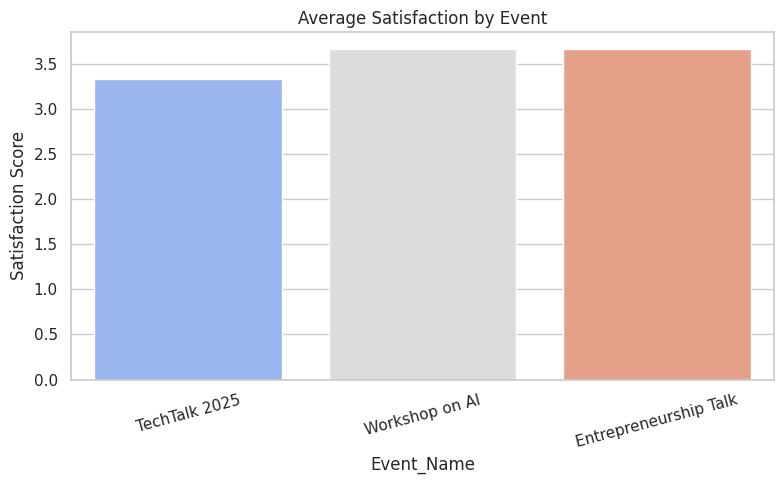

In [12]:
# Satisfaction by Event
plt.figure(figsize=(8,5))
sns.barplot(x='Event_Name', y='Overall_Satisfaction', data=df, ci=None, palette="coolwarm")
plt.title("Average Satisfaction by Event")
plt.ylabel("Satisfaction Score")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

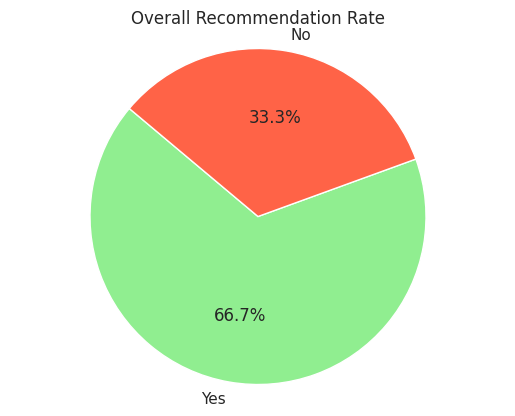

In [13]:
# Recommendation Pie Chart
recommend_counts = df['Would_Recommend'].value_counts()
plt.pie(recommend_counts, labels=recommend_counts.index, autopct='%1.1f%%', startangle=140,
        colors=['lightgreen','tomato'])
plt.title('Overall Recommendation Rate')
plt.axis('equal')
plt.show()

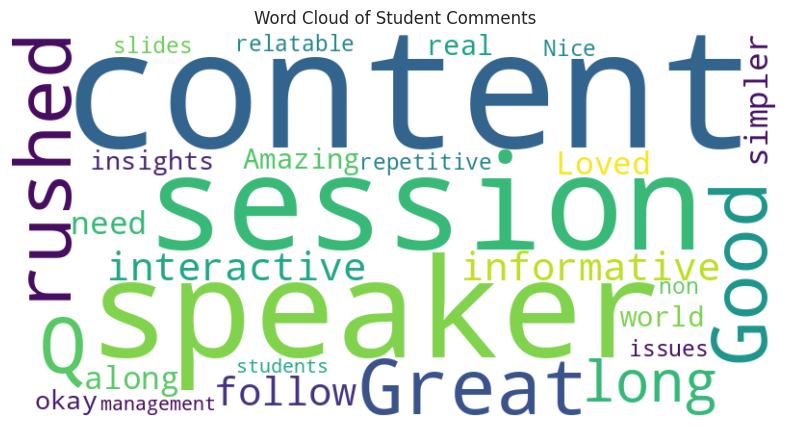

In [14]:
# Word Cloud from Comments
all_comments = ' '.join(df['Comments'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Student Comments")
plt.show()

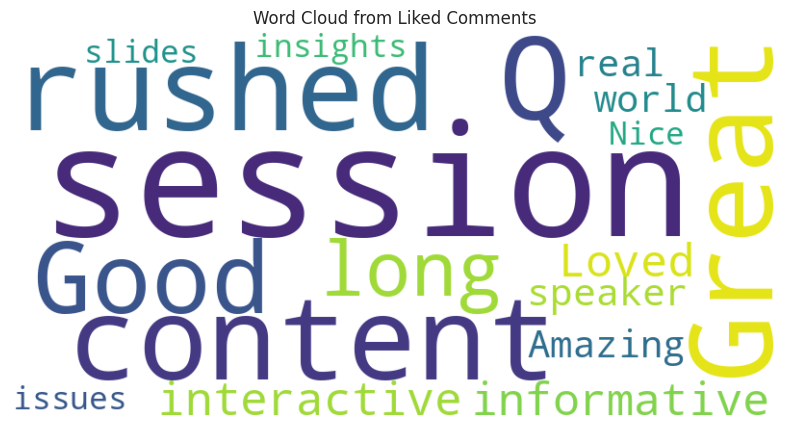

In [15]:
# Extract only positive/liked comments
positive_comments = df[df['Would_Recommend'] == 'Yes']['Comments']
text_likes = ' '.join(positive_comments.tolist())

# Generate word cloud
wordcloud_likes = WordCloud(width=800, height=400, background_color='white').generate(text_likes)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_likes, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from Liked Comments")
plt.show()

/tmp/ipython-input-16-1489809962.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')


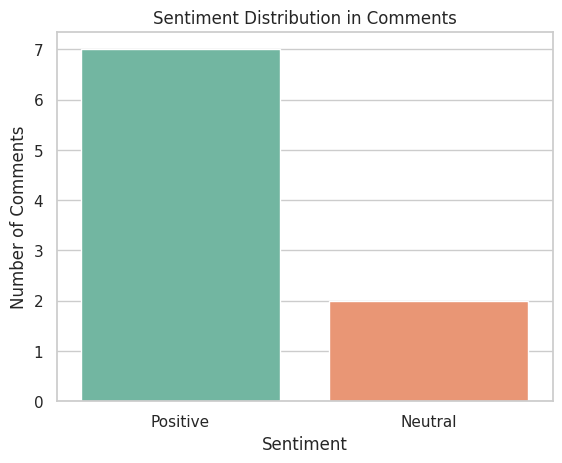

In [16]:
# Sentiment Distribution
sentiment_counts = df['Sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')
plt.title("Sentiment Distribution in Comments")
plt.ylabel("Number of Comments")
plt.show()

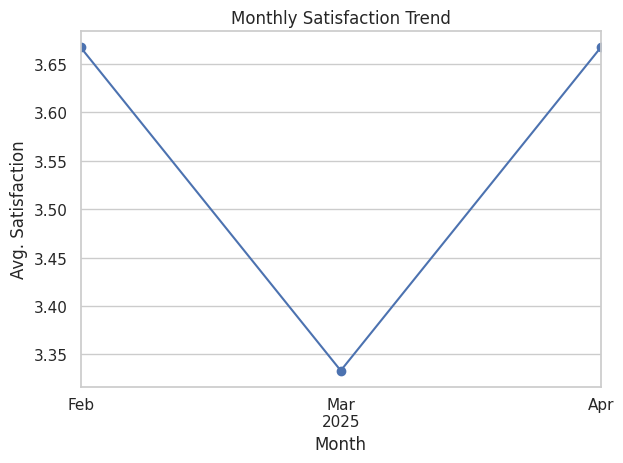

In [17]:
# Monthly Satisfaction Trend
df['Month'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('Month')['Overall_Satisfaction'].mean()
monthly_avg.plot(kind='line', marker='o', title="Monthly Satisfaction Trend", ylabel='Avg. Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()